In [55]:
%matplotlib inline
import pandas as pd
import os, sys
import numpy as np
import math 
import matplotlib.pyplot as plt

In [56]:
n_test = 34

a = 0.05

def func(x):
    return float((np.sqrt(a*(a + 2))) / (1 + a - np.cos(x)) / (2*np.pi))

def fourier(x): # First 15 harmonics of fourier series
    s = 1/2
    
    for i in range(1, 15):
        s += (1 + a + np.sqrt(a*(a + 2)))**(-i)*np.cos(i*x)
        
    return s/np.pi

In [62]:
x_d = np.zeros(n_test + 1)
y_d = np.zeros(n_test + 1)

for i in range(-int(n_test/2), int(n_test/2) + 1):
    x_d[i + int(n_test/2)] = np.pi * 2*i/n_test
    y_d[i + int(n_test/2) ] = func(x_d[i + int(n_test/2)])

x_30 = np.empty(0)
y_30 = np.empty(0)

fl = open("test(3)_lambda0.txt", "r") 
for line in fl:
    tmp = line.split(" ")
    x_30 = np.concatenate((x_30, [float(tmp[0])]), axis = 0)
    y_30 = np.concatenate((y_30, [float(tmp[1])]), axis = 0)

fl.close()

x_31 = np.empty(0)
y_31 = np.empty(0)

fl = open("test(3)_lambda1.txt", "r") 
for line in fl:
    tmp = line.split(" ")
    x_31 = np.concatenate((x_31, [float(tmp[0])]), axis = 0)
    y_31 = np.concatenate((y_31, [float(tmp[1])]), axis = 0)

fl.close()

x_3n1 = np.empty(0)
y_3n1 = np.empty(0)

fl = open("test(3)_lambda-1.txt", "r") 
for line in fl:
    tmp = line.split(" ")
    x_3n1 = np.concatenate((x_3n1, [float(tmp[0])]), axis = 0)
    y_3n1 = np.concatenate((y_3n1, [float(tmp[1])]), axis = 0)

fl.close()

x_4 = np.empty(0)
y_4 = np.empty(0)

fl = open("test(4).txt", "r") 
for line in fl:
    tmp = line.split(" ")
    x_4 = np.concatenate((x_4, [float(tmp[0])]), axis = 0)
    y_4 = np.concatenate((y_4, [float(tmp[1])]), axis = 0)

fl.close()

y_extra_1 = []
y_extra_2 = []

for x in x_30:
    y_extra_1.append(func(x))
    y_extra_2.append(fourier(x))

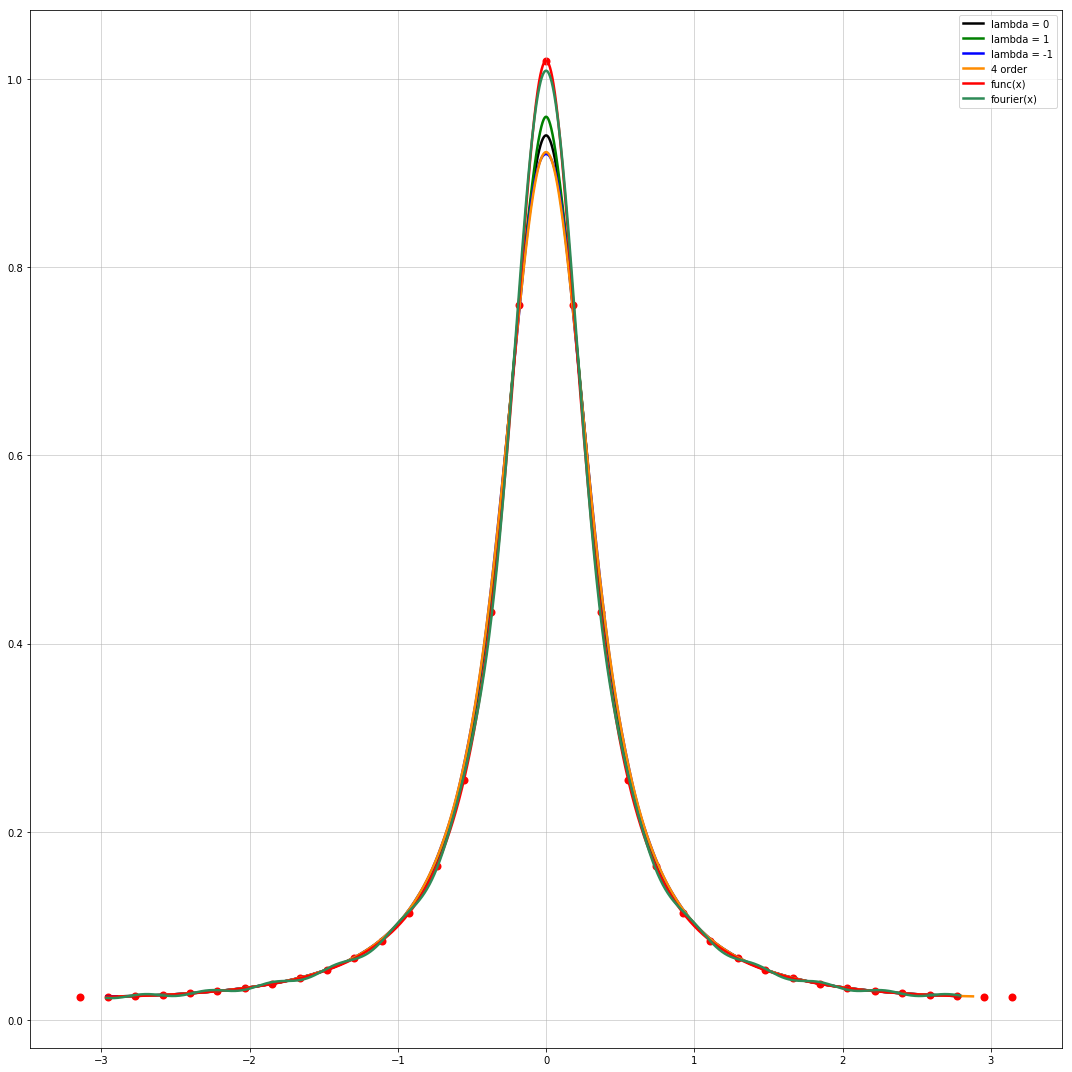

In [71]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111)

linestyles = ['-', '--', '-.']
grlinecolors = ['#000000', '#555555', '#aaaaaa']
linecolors = ['#000000', '#3163e1', '#ff9b2f']

ax.plot(x_30, y_30, lw = 2.5, color = 'k', label = 'lambda = 0')
ax.plot(x_31, y_31, lw = 2.5, color = 'g', label = 'lambda = 1')
ax.plot(x_3n1, y_3n1, lw = 2.5, color = 'b', label = 'lambda = -1')
ax.plot(x_4, y_4, lw = 2.5, color = 'darkorange', label = '4 order')
ax.plot(x_30, y_extra_1, lw = 2.5, color = 'r', label = 'func(x)')
ax.plot(x_30, y_extra_2, lw = 2.5, color = 'seagreen', label = 'fourier(x)')
ax.scatter(x_d, y_d, lw = 2, color = 'r')


#ax.axis('equal')
plt.grid(True, linewidth = 0.5)
plt.tight_layout()
plt.legend()
plt.show()